# Experiments simulation 4


## Imports

In [1]:
import os, sys, random, pickle
from datetime import datetime
from zoneinfo import ZoneInfo  
import polars as pl
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt  
from BigEDA.descriptive import outliers_table
from BigEDA.plots import boxplot_matrix, histogram_matrix, barplot_matrix
from FastKmedoids.plots import clustering_MDS_plot_multiple_methods
sns.set_style('whitegrid')

current_path = os.getcwd()
src_path = os.path.join(current_path, '..', 'src')
config_path = os.path.join(current_path, '..', 'config')
sys.path.append(src_path)
sys.path.append(config_path)

from simulations_utils import get_simulation_4

from experiments_utils import (make_experiment_1, 
                               make_experiment_3, 
                               make_experiment_4,
                               get_pivoted_results, get_avg_results,
                               get_pivoted_results_two_iterables,
                               get_avg_results_two_iterables,
                               avg_results_to_dfs,
                               get_GGower_distances_names, 
                               split_list_in_chunks)

from config_experiment_1_simulation_4 import get_config as get_config_exp_1_sim_4
from config_experiment_3_simulation_4 import get_config as get_config_exp_3_sim_4
from config_experiment_4_simulation_4 import get_config as get_config_exp_4_sim_4


## Data Simulation

35k rows, outlier contamination

In [2]:
X, y, outliers_idx = get_simulation_4(random_state=123, return_outlier_idx=True)

In [3]:
# polars conversion for data exploration
X_pl = pl.from_pandas(X)

## Data Exploration

In [4]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,-11.010788,-8.392472,5.369400,0.119920,0,1,1,1
1,-1.044792,-4.062543,-1.828567,7.173568,0,0,1,2
2,-19.552345,-14.977310,-0.648115,5.806335,1,1,1,3
3,-5.055414,-4.980831,2.078765,-0.971602,1,1,3,3
4,-3.086783,-15.462055,4.129252,6.076827,1,1,1,1


In [5]:
# Proportion of individuals per cluster/group
unique_values, counts = np.unique(y, return_counts=True)
prop_clusters = counts/len(y)
prop_clusters = {k: v for k, v in zip(unique_values, prop_clusters)}
print(f'prop_clusters: {prop_clusters}')

prop_clusters: {0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}


In [6]:
# Outliers information
outliers_table(X_pl, auto=False, col_names=['X1', 'X2', 'X3', 'X4'], h=1.5)

quant_variables,lower_bound,upper_bound,n_outliers,n_not_outliers,prop_outliers,prop_not_outliers
str,f64,f64,i64,i64,f64,f64
"""X1""",-17.545317,14.887238,14103,285897,0.04701,0.95299
"""X2""",-12.881788,3.970274,16133,283867,0.053777,0.946223
"""X3""",-12.105019,6.446671,2770,297230,0.009233,0.990767
"""X4""",-6.178026,10.435668,1378,298622,0.004593,0.995407


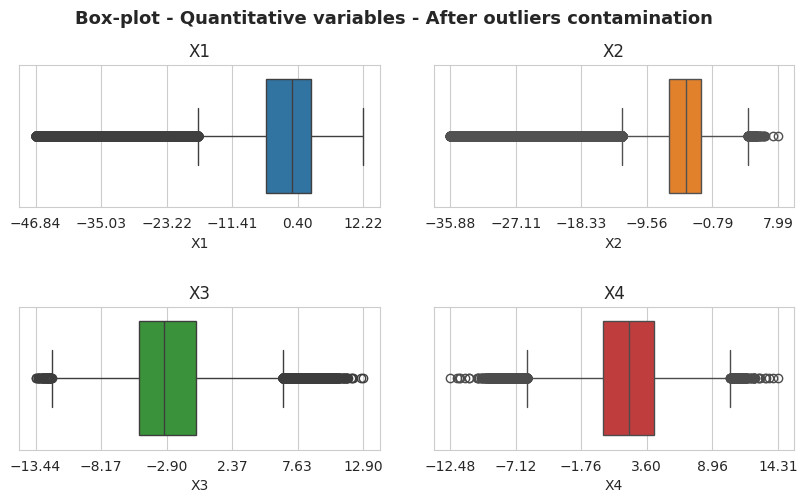

In [7]:
# Boxplot after outliers contamination
boxplot_matrix(X_pl, 
               n_cols=2, 
               title='Box-plot - Quantitative variables - After outliers contamination', 
               figsize=(10,5), 
               quant_col_names=['X1', 'X2', 'X3', 'X4'], 
               n_xticks=6, 
               title_fontsize=13, 
               save=False, 
               file_name='', 
               x_rotation=0, 
               title_height=0.99,
               style='whitegrid', 
               hspace=0.7, 
               wspace=0.15, 
               title_weight='bold',
               subtitles_fontsize=12, 
               xlabel_size=10)

In [8]:
# Boxplot before outliers contamination
'''
boxplot_matrix(X_not_outliers, 
               n_cols=2, 
               title='Box-plot - Quantitative variables - Before outliers contamination', 
               figsize=(10,5), 
               quant_col_names=['X1', 'X2', 'X3', 'X4'], 
               n_xticks=6, 
               title_fontsize=13, 
               save=False, 
               file_name='', 
               x_rotation=0, 
               title_height=0.99,
               style='whitegrid', 
               hspace=0.7, 
               wspace=0.15, 
               title_weight='bold',
               subtitles_fontsize=12, 
               xlabel_size=10)
'''

"\nboxplot_matrix(X_not_outliers, \n               n_cols=2, \n               title='Box-plot - Quantitative variables - Before outliers contamination', \n               figsize=(10,5), \n               quant_col_names=['X1', 'X2', 'X3', 'X4'], \n               n_xticks=6, \n               title_fontsize=13, \n               save=False, \n               file_name='', \n               x_rotation=0, \n               title_height=0.99,\n               style='whitegrid', \n               hspace=0.7, \n               wspace=0.15, \n               title_weight='bold',\n               subtitles_fontsize=12, \n               xlabel_size=10)\n"

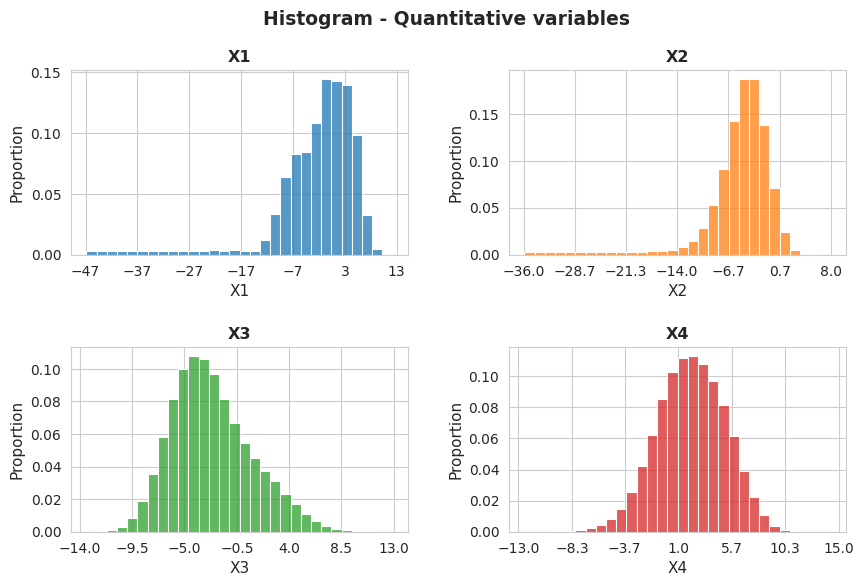

In [9]:
# Histogram
histogram_matrix(df=X_pl, bins=30, n_cols=2, title='Histogram - Quantitative variables', 
                 figsize=(10,6), quant_col_names=['X1', 'X2', 'X3', 'X4'], 
                 n_xticks=7, title_fontsize=13.5, 
                 subtitles_fontsize=11.5, save=False, file_name='', x_rotation=0, title_height=0.98,
                 style='whitegrid', hspace=0.5, wspace=0.3, n_round_xticks=1)

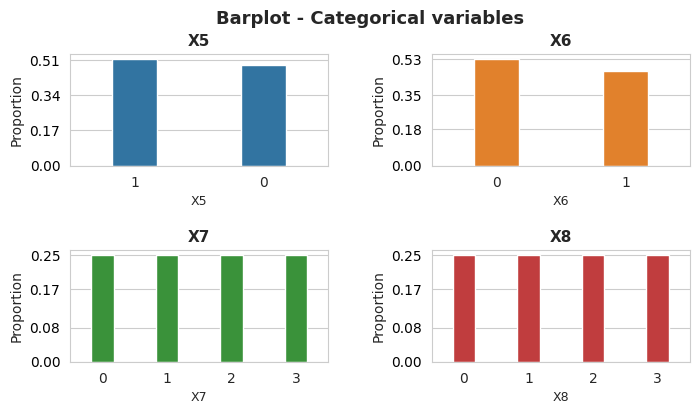

In [10]:
# Barplot
barplot_matrix(df=X_pl, n_cols=2, title='Barplot - Categorical variables', 
                 figsize=(8,4), cat_col_names=['X5', 'X6', 'X7', 'X8'], 
                 title_fontsize=13, subtitles_fontsize=11, 
                 save=False, file_name='', x_rotation=0, title_height=0.99,
                 style='whitegrid', hspace=0.75, wspace=0.4, title_weight='bold', bar_width=0.35,
                 ylabel_size=10, xlabel_size=9, xticks_size=10)

In [11]:
# Correlation Matrix
X.corr()

,X1,X2,X3,X4,X5,X6,X7,X8
X1,1.000000,0.786889,-0.347701,0.053636,0.082964,-0.260040,0.159865,0.105302
X2,0.786889,1.000000,-0.140447,0.168428,-0.138259,-0.258026,-0.142206,0.117641
X3,-0.347701,-0.140447,1.000000,-0.099761,-0.104118,0.410078,-0.216587,-0.166032
X4,0.053636,0.168428,-0.099761,1.000000,-0.374913,-0.423426,-0.434338,0.199490
X5,0.082964,-0.138259,-0.104118,-0.374913,1.000000,0.317317,0.595865,-0.163468
X6,-0.260040,-0.258026,0.410078,-0.423426,0.317317,1.000000,0.317800,-0.302007
X7,0.159865,-0.142206,-0.216587,-0.434338,0.595865,0.317800,1.000000,-0.167720
X8,0.105302,0.117641,-0.166032,0.199490,-0.163468,-0.302007,-0.167720,1.000000


In [12]:
# Correlation Analysis
corr_matrix = X.corr().to_numpy()
n_corr = len(corr_matrix[np.triu_indices_from(corr_matrix, k=1)])
n_corr_below_30 = np.sum(np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) < 0.30)
n_corr_above_60 = np.sum(np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) > 0.60)
n_corr_between = np.sum((np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) >= 0.30) & (np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) <= 0.60))
                        
print('Proportion of pair-wise correlation > 0.60 (in abs. value): ', np.round(n_corr_above_60 / n_corr, 2))
print('Proportion of pair-wise correlations in [0.30, 0.60]: ', np.round(n_corr_between / n_corr, 2))
print('Proportion of pair-wise correlation < 0.30 (in abs. value): ', np.round(n_corr_below_30 / n_corr, 2))

Proportion of pair-wise correlation > 0.60 (in abs. value):  0.04
Proportion of pair-wise correlations in [0.30, 0.60]:  0.32
Proportion of pair-wise correlation < 0.30 (in abs. value):  0.64


## Experiment 1: Accuracy and computation time for Fast k-medoids (section 3.2)

In [14]:
run_experiment_1 = True

In [ ]:
if run_experiment_1: 
        
    n_realizations = 100
    experiment_random_state = 123 
    random.seed(experiment_random_state)
    random_state_list = random.sample(range(n_realizations*1000), n_realizations)

    chunk_size = 3
    random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

    results_folder_path = os.path.join(current_path, '..', 'results', 'results_experiment_1', 'simulation_4')
    os.makedirs(results_folder_path, exist_ok=True)
    #file_id = datetime.now(ZoneInfo("Europe/Madrid")).strftime('%Y%m%d_%H%M%S')
    file_id = "20250728_164200"

    experiment_1_config = get_config_exp_1_sim_4()

    X, y = get_simulation_4(random_state=experiment_random_state, return_outlier_idx=False)

    for chunk_id, random_state_chunk in enumerate(tqdm(random_state_list_chunks[21:], desc='chunks', unit='chunks'), start=21):
        print("chunk_id:", chunk_id)
        print('random_state_chunk:', random_state_chunk)

        results = {}

        for random_state in random_state_chunk:
            print('random_state:', random_state)
                
            results[random_state] = make_experiment_1(**experiment_1_config,
                                                      X=X, 
                                                      y=y,
                                                      random_state=random_state)
            
        # Save results
        results_filename = f'results_exp_1_simu_4_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'wb') as f:
            pickle.dump(results, f)

# Time 100 realization 
## Personal computer: 
## IBiDat Server: 80*34 mins = 45 hours

chunks:   0%|          | 0/13 [00:00<?, ?chunks/s]

chunk_id: 21
random_state_chunk: [87380, 78185, 63718]
random_state: 87380
frac_sample_size: 0.0005
frac_sample_size: 0.005
frac_sample_size: 0.01
frac_sample_size: 0.05
frac_sample_size: 0.1
frac_sample_size: 0.2
random_state: 78185
frac_sample_size: 0.0005
frac_sample_size: 0.005
frac_sample_size: 0.01
frac_sample_size: 0.05
frac_sample_size: 0.1
frac_sample_size: 0.2
random_state: 63718
frac_sample_size: 0.0005
frac_sample_size: 0.005
frac_sample_size: 0.01
frac_sample_size: 0.05
frac_sample_size: 0.1
frac_sample_size: 0.2


chunks:   8%|▊         | 1/13 [2:57:10<35:26:11, 10630.95s/chunks]

chunk_id: 22
random_state_chunk: [68237, 87617, 54984]
random_state: 68237
frac_sample_size: 0.0005
frac_sample_size: 0.005
frac_sample_size: 0.01
frac_sample_size: 0.05
frac_sample_size: 0.1
frac_sample_size: 0.2
random_state: 87617
frac_sample_size: 0.0005
frac_sample_size: 0.005
frac_sample_size: 0.01
frac_sample_size: 0.05
frac_sample_size: 0.1
frac_sample_size: 0.2
random_state: 54984
frac_sample_size: 0.0005
frac_sample_size: 0.005
frac_sample_size: 0.01
frac_sample_size: 0.05
frac_sample_size: 0.1
frac_sample_size: 0.2


chunks:  15%|█▌        | 2/13 [6:03:14<33:26:24, 10944.05s/chunks]

chunk_id: 23
random_state_chunk: [49089, 66855, 4173]
random_state: 49089
frac_sample_size: 0.0005
frac_sample_size: 0.005
frac_sample_size: 0.01
frac_sample_size: 0.05
frac_sample_size: 0.1
frac_sample_size: 0.2


In [16]:
        
    n_realizations = 100
    experiment_random_state = 123 
    random.seed(experiment_random_state)
    random_state_list = random.sample(range(n_realizations*1000), n_realizations)

    chunk_size = 3
    random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

In [ ]:
if run_experiment_1: 

    # Open results by chunk
    chunk_ids = range(len(random_state_list_chunks))
    results_chunk = {}
    file_id = '20250728_164200'
    results_folder_path = os.path.join(current_path, '..', 'results', 'results_experiment_1', 'simulation_4')
    for chunk_id in chunk_ids:
        results_filename = f'results_exp_1_simu_4_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'rb') as f:
            results_chunk[chunk_id] = pickle.load(f)

    # Join results by chunks
    results = {}
    for i in chunk_ids:
        results.update(results_chunk[i])  

    # Save joined/merged results 
    results_filename = f'results_exp_1_simu_4_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'wb') as f:
        pickle.dump(results, f)

In [20]:
# Open merged/joined results 
file_id = '20250728_164200'
results_filename = f'results_exp_1_simu_4_{file_id}.pkl'
results_folder_path = os.path.join(current_path, '..', 'results', 'results_experiment_1', 'simulation_4')
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    results = pickle.load(f)

In [21]:
results

{6863: {'time': {0.0005: 92.86066579818726,
   0.005: 92.57912921905518,
   0.01: 92.89056491851807,
   0.05: 133.1420772075653,
   0.1: 301.58556151390076,
   0.2: 1013.9202024936676},
  'adj_accuracy': {0.0005: 0.8773166666666666,
   0.005: 0.8285366666666667,
   0.01: 0.8320166666666666,
   0.05: 0.7700166666666667,
   0.1: 0.7700133333333333,
   0.2: 0.7667633333333334},
  'ARI': {0.0005: 0.6809218102531636,
   0.005: 0.5913681427122639,
   0.01: 0.5977300756706608,
   0.05: 0.5094552559626202,
   0.1: 0.5094626374965406,
   0.2: 0.5068990784274174}},
 35084: {'time': {0.0005: 92.22998762130737,
   0.005: 91.6388111114502,
   0.01: 92.6452476978302,
   0.05: 132.92018151283264,
   0.1: 236.4708652496338,
   0.2: 714.2626647949219},
  'adj_accuracy': {0.0005: 0.8312933333333333,
   0.005: 0.8403366666666666,
   0.01: 0.8388733333333334,
   0.05: 0.8333,
   0.1: 0.75499,
   0.2: 0.76151},
  'ARI': {0.0005: 0.5984359959226845,
   0.005: 0.6142970408827634,
   0.01: 0.611194935636982,


In [22]:
experiment_1_config = get_config_exp_1_sim_4()

pivoted_results = get_pivoted_results(
    results=results, 
    iterable=experiment_1_config['frac_sample_sizes']
)

avg_results = get_avg_results(
    results=results, 
    pivoted_results=pivoted_results, 
    iterable=experiment_1_config['frac_sample_sizes']
)

In [24]:
frac_sample_sizes_list = np.array(list(avg_results['adj_accuracy'].keys()))
adj_accuracy_list = list(avg_results['adj_accuracy'].values())
ari_list = list(avg_results['ARI'].values())
time_list = list(avg_results['time'].values())
best_frac_sample_size = frac_sample_sizes_list[np.argmax(adj_accuracy_list)]

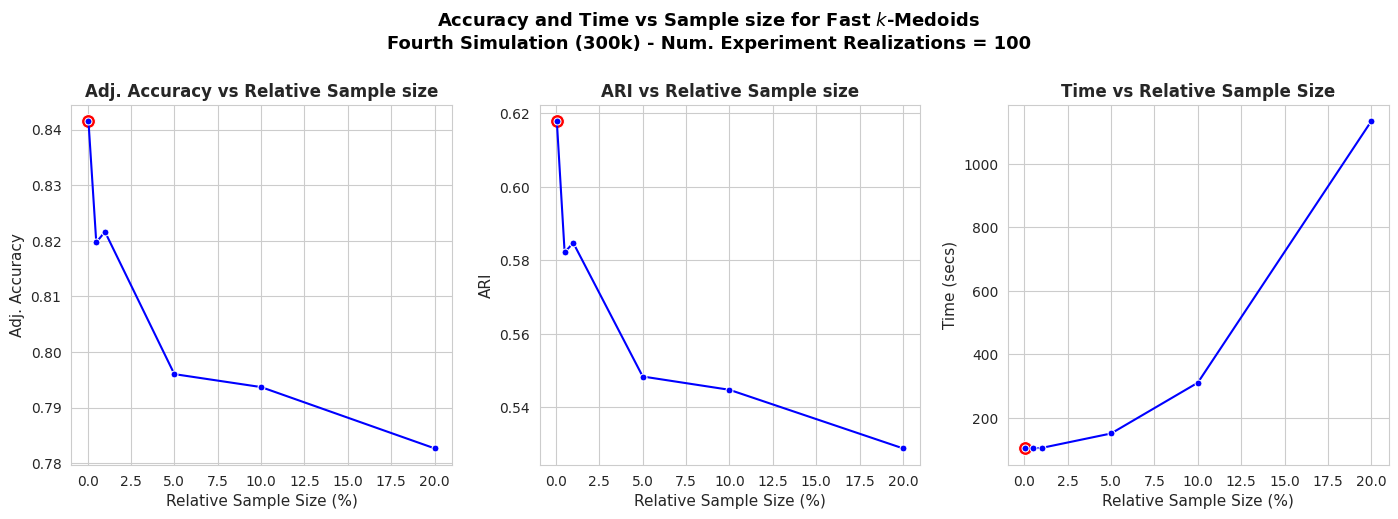

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(17,5))
axes = axes.flatten()  

sns.lineplot(x=[best_frac_sample_size * 100], y=[avg_results['adj_accuracy'][best_frac_sample_size]], color='red', marker='o',  markersize=10, ax=axes[0])
sns.lineplot(
    x=frac_sample_sizes_list * 100,
    y=adj_accuracy_list, 
    color='blue', marker='o',  markersize=5, ax=axes[0]
)

sns.lineplot(x=[best_frac_sample_size * 100], y=[avg_results['ARI'][best_frac_sample_size]], color='red', marker='o',  markersize=10, ax=axes[1])
sns.lineplot(
    x=frac_sample_sizes_list * 100,
    y=ari_list, 
    color='blue', marker='o',  markersize=5, ax=axes[1]
)

sns.lineplot(x=[best_frac_sample_size * 100], y=[avg_results['time'][best_frac_sample_size]], color='red', marker='o', markersize=10, ax=axes[2])
sns.lineplot(
    x=frac_sample_sizes_list * 100,
    y=time_list, 
    color='blue', marker='o', markersize=5, ax=axes[2]
)

axes[0].set_title('Adj. Accuracy vs Relative Sample size', size=12, weight='bold')
axes[0].set_ylabel('Adj. Accuracy', size=11)
#axes[0].set_yticks(np.round(np.linspace(np.min(best_accuracy_values), np.max(best_accuracy_values), 7),3))

axes[1].set_title('ARI vs Relative Sample size', size=12, weight='bold')
axes[1].set_ylabel('ARI', size=11)
#axes[1].set_yticks(np.round(np.linspace(np.min(best_accuracy_values), np.max(best_accuracy_values), 7),3))

axes[2].set_title('Time vs Relative Sample Size', size=12, weight='bold')
axes[2].set_ylabel('Time (secs)', size=11)
#axes[2].set_yticks(np.round(np.linspace(np.min(times_values), np.max(times_values), 7),1))

for i in range(len(axes)):
    #axes[i].set_xticks(np.round(np.linspace(np.min(data_perc_sizes), np.max(data_perc_sizes), 7),1))
    axes[i].set_xlabel('Relative Sample Size (%)', size=11)

#plt.tight_layout()
plt.subplots_adjust(top=0.83)
plt.suptitle('Accuracy and Time vs Sample size for Fast $k$-Medoids\nFourth Simulation (300k) - Num. Experiment Realizations = 100', fontsize=13, y=1.02, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=0.5, wspace=0.23) 

plot_filename = f'plot_results_exp_1_simu_4_{file_id}.png'
plot_save_path = os.path.join(results_folder_path, plot_filename)
fig.savefig(plot_save_path, format='png', dpi=300, bbox_inches="tight", pad_inches=0.2)

plt.show()

**Nota:** si queremos que los datos de tiempo sean coherentes con mi pc personal (realista con un PC de  usuario normal) hay que multiplicarlos por 2, ya que el experimento ha sido corrido con el server, y en base a mis pruebas piloto, el serber acorta los tiempos a la mitad, aprox.


In [27]:
# Results as table 
avg_results_df = pd.DataFrame(avg_results)
avg_results_df.index.name = 'frac_sample_size'
avg_results_df

,time,adj_accuracy,ARI
frac_sample_size,,,
0.0005,104.253231,0.841550,0.617907
0.0050,104.551859,0.819730,0.582234
0.0100,105.651368,0.821644,0.584760
0.0500,151.108308,0.796034,0.548425
0.1000,311.055373,0.793704,0.544806
0.2000,1134.878031,0.782681,0.528878


In [28]:
print(best_frac_sample_size)

0.0005



## Experiment 3: Accuracy, computation time and number of folds for q-Fold Fast k-medoids (section 3.4)

In [2]:
run_experiment_3 = True

In [3]:
if run_experiment_3: 

    n_realizations = 70
    experiment_random_state = 123 
    random.seed(experiment_random_state)
    random_state_list = random.sample(range(n_realizations*1000), n_realizations)

    chunk_size = 3
    random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

    results_folder_path = os.path.join(current_path, '..', 'results', 'results_experiment_3', 'simulation_4')
    os.makedirs(results_folder_path, exist_ok=True)
    file_id = datetime.now(ZoneInfo("Europe/Madrid")).strftime('%Y%m%d_%H%M%S')

    experiment_3_config = get_config_exp_3_sim_4()

    X, y = get_simulation_4(random_state=experiment_random_state, return_outlier_idx=False)

    for chunk_id, random_state_chunk in enumerate(tqdm(random_state_list_chunks), start=0):
        print('random_state_chunk:', random_state_chunk)

        results = {}

        for random_state in random_state_chunk:
            print('random_state:', random_state)    

            results[random_state] = make_experiment_3(**experiment_3_config,
                                                    X=X, 
                                                    y=y,
                                                    random_state=random_state)

        # Save results
        results_filename = f'results_exp_3_simu_4_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'wb') as f:
            pickle.dump(results, f)

# Time 100 realization
## IBiDat Server: 220*34 mins =  hours

  0%|          | 0/24 [00:00<?, ?it/s]

random_state_chunk: [6863, 35084, 11427]
random_state: 6863
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:21<00:00, 40.25s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:26<00:00, 41.21s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [03:59<00:00, 47.81s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [05:31<00:00, 66.21s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:20<00:00, 20.02s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:30<00:00, 21.06s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [05:00<00:00, 30.10s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [05:44<00:00, 34.44s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [04:53<00:00, 14.65s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [04:34<00:00, 13.72s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [05:30<00:00, 16.52s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [05:55<00:00, 17.76s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [05:23<00:00,  8.09s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [04:58<00:00,  7.47s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [05:05<00:00,  7.64s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 40/40 [04:46<00:00,  7.17s/it]


random_state: 35084
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [04:27<00:00, 53.41s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [04:42<00:00, 56.55s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [05:38<00:00, 67.60s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [07:35<00:00, 91.17s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [04:36<00:00, 27.67s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [04:41<00:00, 28.11s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [04:50<00:00, 29.05s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [05:47<00:00, 34.79s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [04:51<00:00, 14.56s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [04:43<00:00, 14.16s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [04:58<00:00, 14.93s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [04:57<00:00, 14.89s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [05:17<00:00,  7.93s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [05:15<00:00,  7.88s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [05:00<00:00,  7.51s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 40/40 [04:56<00:00,  7.41s/it]


random_state: 11427
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [04:44<00:00, 56.87s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [04:52<00:00, 58.55s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [05:35<00:00, 67.18s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [07:29<00:00, 89.87s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [04:50<00:00, 29.10s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [04:43<00:00, 28.37s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [04:55<00:00, 29.57s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [05:38<00:00, 33.86s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [05:06<00:00, 15.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [04:49<00:00, 14.47s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [05:12<00:00, 15.60s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [05:12<00:00, 15.61s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [05:20<00:00,  8.02s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [04:58<00:00,  7.47s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [04:57<00:00,  7.44s/it]


frac_sample_size: 0.15


  4%|▍         | 1/24 [4:03:30<93:20:35, 14610.25s/it]

random_state_chunk: [53377, 34937, 14116]
random_state: 53377
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [05:33<00:00, 66.69s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:55<00:00, 47.04s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:00<00:00, 48.00s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [05:18<00:00, 63.74s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:17<00:00, 19.79s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:10<00:00, 19.02s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [03:27<00:00, 20.72s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:19<00:00, 25.94s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [03:36<00:00, 10.83s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:29<00:00, 10.47s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:24<00:00, 10.25s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [03:33<00:00, 10.70s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [03:36<00:00,  5.42s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [03:39<00:00,  5.48s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [03:28<00:00,  5.22s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 40/40 [03:34<00:00,  5.37s/it]


random_state: 34937
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:09<00:00, 37.82s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:27<00:00, 41.59s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:08<00:00, 49.69s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [05:25<00:00, 65.01s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:26<00:00, 20.68s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:19<00:00, 19.98s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [03:32<00:00, 21.26s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:14<00:00, 25.40s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [03:17<00:00,  9.86s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:23<00:00, 10.19s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:25<00:00, 10.28s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [03:38<00:00, 10.91s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [03:38<00:00,  5.45s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [03:40<00:00,  5.52s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [03:52<00:00,  5.82s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 40/40 [03:52<00:00,  5.82s/it]


random_state: 14116
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:36<00:00, 43.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:57<00:00, 47.59s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:31<00:00, 54.38s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [06:14<00:00, 74.82s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:57<00:00, 23.73s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:53<00:00, 23.31s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [04:03<00:00, 24.38s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:43<00:00, 28.36s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [03:47<00:00, 11.37s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:34<00:00, 10.72s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:50<00:00, 11.52s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [04:07<00:00, 12.38s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [04:08<00:00,  6.21s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [03:55<00:00,  5.90s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [03:51<00:00,  5.79s/it]


frac_sample_size: 0.15


  8%|▊         | 2/24 [7:12:02<77:25:51, 12670.53s/it]

random_state_chunk: [5000, 49692, 43541]
random_state: 5000
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:43<00:00, 44.70s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:45<00:00, 45.09s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:47<00:00, 57.54s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [06:15<00:00, 75.06s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:47<00:00, 22.74s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:47<00:00, 22.75s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [04:01<00:00, 24.14s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:46<00:00, 28.63s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [03:53<00:00, 11.68s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:54<00:00, 11.70s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:56<00:00, 11.84s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [04:09<00:00, 12.47s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [04:10<00:00,  6.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [04:04<00:00,  6.11s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [03:55<00:00,  5.89s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 40/40 [03:52<00:00,  5.80s/it]


random_state: 49692
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:47<00:00, 45.44s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:55<00:00, 47.05s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:37<00:00, 55.42s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [05:55<00:00, 71.13s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:45<00:00, 22.59s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:33<00:00, 21.38s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [04:12<00:00, 25.21s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:41<00:00, 28.15s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [03:57<00:00, 11.90s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:52<00:00, 11.60s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:49<00:00, 11.47s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [04:10<00:00, 12.51s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [04:19<00:00,  6.49s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [04:05<00:00,  6.15s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [04:00<00:00,  6.02s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 40/40 [04:05<00:00,  6.15s/it]


random_state: 43541
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:50<00:00, 46.03s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:58<00:00, 47.62s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:41<00:00, 56.29s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [06:21<00:00, 76.21s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:39<00:00, 21.97s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:50<00:00, 23.02s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [04:00<00:00, 24.03s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:49<00:00, 28.93s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [03:52<00:00, 11.64s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:39<00:00, 10.95s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:48<00:00, 11.43s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [03:57<00:00, 11.87s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [04:12<00:00,  6.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [04:06<00:00,  6.17s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [04:03<00:00,  6.09s/it]


frac_sample_size: 0.15


 12%|█▎        | 3/24 [10:33:46<72:24:01, 12411.50s/it]

random_state_chunk: [44669, 6802, 20927]
random_state: 44669
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:43<00:00, 44.65s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:59<00:00, 47.89s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:52<00:00, 58.51s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [06:22<00:00, 76.50s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:53<00:00, 23.40s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:52<00:00, 23.21s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [04:16<00:00, 25.66s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:46<00:00, 28.60s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [04:00<00:00, 12.03s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:36<00:00, 10.83s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:49<00:00, 11.47s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [04:04<00:00, 12.25s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [04:11<00:00,  6.28s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [04:10<00:00,  6.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [03:51<00:00,  5.78s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 40/40 [03:54<00:00,  5.87s/it]


random_state: 6802
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:39<00:00, 43.90s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:38<00:00, 43.74s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:38<00:00, 55.71s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [06:06<00:00, 73.24s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:44<00:00, 22.41s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:39<00:00, 21.97s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [03:55<00:00, 23.52s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:39<00:00, 28.00s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [03:58<00:00, 11.94s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:48<00:00, 11.45s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:52<00:00, 11.62s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [04:10<00:00, 12.50s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [04:15<00:00,  6.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [04:02<00:00,  6.07s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [03:58<00:00,  5.95s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 40/40 [03:55<00:00,  5.88s/it]


random_state: 20927
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:43<00:00, 44.68s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:54<00:00, 46.98s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:36<00:00, 55.38s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [06:09<00:00, 73.87s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:44<00:00, 22.48s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:43<00:00, 22.31s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [03:59<00:00, 23.95s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:32<00:00, 27.26s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [03:48<00:00, 11.42s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:46<00:00, 11.32s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:48<00:00, 11.43s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [04:03<00:00, 12.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [04:15<00:00,  6.40s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [03:53<00:00,  5.84s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [04:03<00:00,  6.10s/it]


frac_sample_size: 0.15


 17%|█▋        | 4/24 [13:54:46<68:10:59, 12273.00s/it]

random_state_chunk: [17702, 44199, 43751]
random_state: 17702
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:50<00:00, 46.01s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:59<00:00, 47.85s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [05:07<00:00, 61.59s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [06:29<00:00, 77.88s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:52<00:00, 23.21s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:48<00:00, 22.86s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [03:56<00:00, 23.69s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:40<00:00, 28.09s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [03:51<00:00, 11.56s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:46<00:00, 11.32s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:41<00:00, 11.08s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [03:53<00:00, 11.67s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [04:04<00:00,  6.10s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [04:06<00:00,  6.16s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [03:58<00:00,  5.96s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 40/40 [04:03<00:00,  6.09s/it]


random_state: 44199
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:45<00:00, 45.06s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:47<00:00, 45.57s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:31<00:00, 54.28s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [06:32<00:00, 78.53s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:45<00:00, 22.53s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [03:43<00:00, 22.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [04:00<00:00, 24.01s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:43<00:00, 28.39s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [03:57<00:00, 11.86s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:52<00:00, 11.63s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [03:59<00:00, 11.97s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [04:04<00:00, 12.24s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [04:15<00:00,  6.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [04:18<00:00,  6.46s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [04:04<00:00,  6.11s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 40/40 [03:59<00:00,  5.99s/it]


random_state: 43751
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [03:37<00:00, 43.59s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [03:45<00:00, 45.15s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [04:27<00:00, 53.42s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 5/5 [06:08<00:00, 73.80s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [03:41<00:00, 22.14s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [04:03<00:00, 24.31s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [04:49<00:00, 28.93s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 10/10 [04:51<00:00, 29.19s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [04:06<00:00, 12.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [03:56<00:00, 11.82s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [04:06<00:00, 12.33s/it]


frac_sample_size: 0.15


Clustering Folds: 100%|██████████| 20/20 [04:28<00:00, 13.43s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [05:09<00:00,  7.74s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [05:06<00:00,  7.66s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [04:46<00:00,  7.17s/it]


frac_sample_size: 0.15


 21%|██        | 5/24 [17:22:28<65:07:59, 12341.03s/it]

random_state_chunk: [32134, 21466, 218]
random_state: 32134
n_splits: 5
frac_sample_size: 0.005


 21%|██        | 5/24 [17:24:50<66:10:24, 12538.11s/it]


KeyboardInterrupt: 

In [ ]:
if run_experiment_3: 

    # Open results by chunk
    results_folder_path = os.path.join(current_path, '..', 'results', 'results_experiment_3', 'simulation_4')
    chunk_ids = range(len(os.listdir(results_folder_path)))
    results_chunk = {}
    file_id = ""
    for chunk_id in chunk_ids:
        results_filename = f'results_exp_3_simu_4_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'rb') as f:
            results_chunk[chunk_id] = pickle.load(f)

    # Join results by chunks
    results = {}
    for i in chunk_ids:
        results.update(results_chunk[i])  

    # Save joined/merged results 
    results_filename = f'results_exp_3_simu_4_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'wb') as f:
        pickle.dump(results, f)

In [ ]:
# Open merged/joined results 
file_id = "20250715_130253"
results_filename = f'results_exp_3_simu_4_{file_id}.pkl'
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    results = pickle.load(f)

In [ ]:
experiment_3_config = get_config_exp_3_sim_4()

pivoted_results = get_pivoted_results_two_iterables(results = results, 
                                  iterable1 = experiment_3_config['n_splits'], 
                                  iterable2 = experiment_3_config['frac_sample_sizes'])

avg_results = get_avg_results_two_iterables(results = results, 
                                  pivoted_results = pivoted_results, 
                                  iterable1 = experiment_3_config['n_splits'], 
                                  iterable2 = experiment_3_config['frac_sample_sizes'])

dfs = avg_results_to_dfs(avg_results, column_1='n_splits', column_2='frac_sample_sizes')

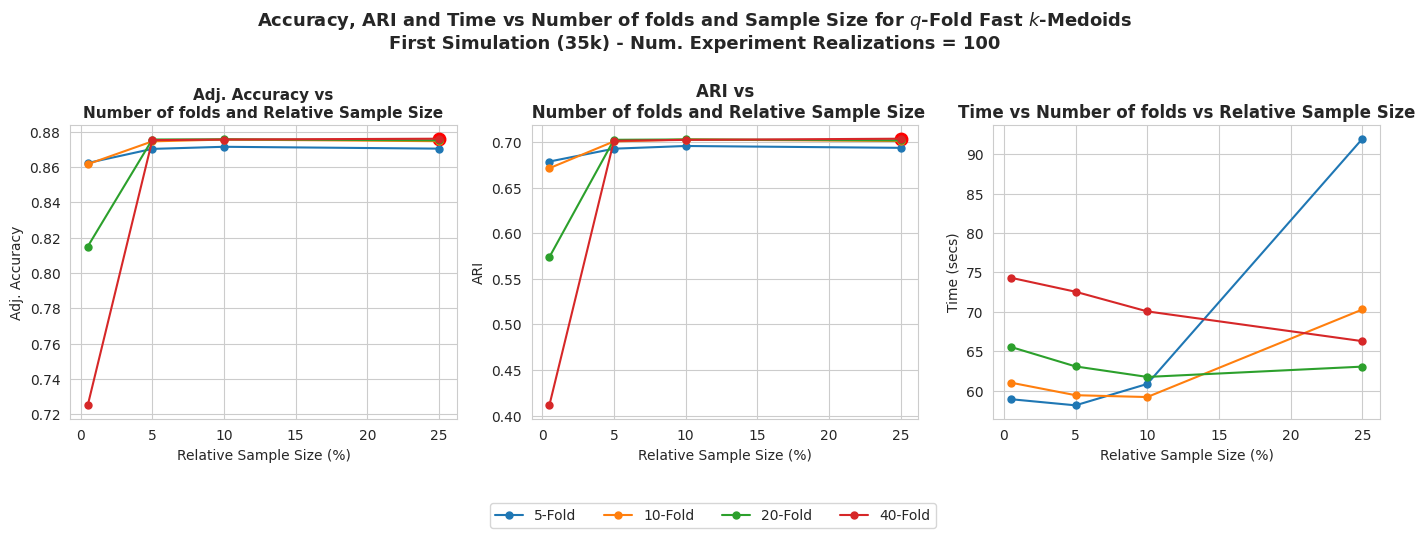

In [ ]:
best_combi_acc = dfs['adj_accuracy'].sort_values(by='adj_accuracy', ascending=False).iloc[0]
best_combi_ari = dfs['ARI'].sort_values(by='ARI', ascending=False).iloc[0]
best_combi_time = dfs['time'].sort_values(by='time', ascending=True).iloc[0]

fig, axes = plt.subplots(1, 3, figsize=(14, 5.5), sharex=True)

# Primer subplot: Accuracy
ax1 = axes[0]
ax1.plot(best_combi_acc['frac_sample_sizes'] * 100, best_combi_acc['adj_accuracy'], marker='o', markersize=9, color='red')
for k1 in sorted(dfs['adj_accuracy']['n_splits'].unique()):
    subset = dfs['adj_accuracy'][dfs['adj_accuracy']['n_splits'] == k1]
    ax1.plot(subset['frac_sample_sizes'] * 100, subset['adj_accuracy'], marker='o', markersize=5, label=f"{k1}-Fold")
ax1.set_title("Adj. Accuracy vs\nNumber of folds and Relative Sample Size", fontsize=11, fontweight='bold')
ax1.set_xlabel("Relative Sample Size (%)")
ax1.set_ylabel("Adj. Accuracy")

# Segundo subplot: Accuracy
ax2 = axes[1]
ax2.plot(best_combi_ari['frac_sample_sizes'] * 100, best_combi_ari['ARI'], marker='o', markersize=9, color='red')
for k1 in sorted(dfs['ARI']['n_splits'].unique()):
    subset = dfs['ARI'][dfs['ARI']['n_splits'] == k1]
    ax2.plot(subset['frac_sample_sizes'] * 100, subset['ARI'], marker='o', markersize=5, label=f"{k1}-Fold")
ax2.set_title("ARI vs\n Number of folds and Relative Sample Size", fontsize=12, fontweight='bold')
ax2.set_xlabel("Relative Sample Size (%)")
ax2.set_ylabel("ARI")

# Tercer subplot: Time
ax3 = axes[2]
#ax3.plot(best_combi_time['frac_sample_sizes'] * 100, best_combi_time['time'], marker='o', markersize=9, color='red')
for k1 in sorted(dfs['time']['n_splits'].unique()):
    subset = dfs['time'][dfs['time']['n_splits'] == k1]
    ax3.plot(subset['frac_sample_sizes'] * 100, subset['time'], marker='o', markersize=5, label=f"{k1}-Fold")
ax3.set_title("Time vs Number of folds vs Relative Sample Size", fontsize=12, fontweight='bold')
ax3.set_xlabel("Relative Sample Size (%)")
ax3.set_ylabel("Time (secs)")

# Título general
fig.suptitle("Accuracy, ARI and Time vs Number of folds and Sample Size for $q$-Fold Fast $k$-Medoids\nThird Simulation (100k) - Num. Experiment Realizations = 100", fontsize=13, fontweight='bold', y=0.95)

# Leyenda común abajo
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(labels), fontsize=10)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])

plot_filename = f'plot_results_exp_3_simu_4_{file_id}.png'
plot_save_path = os.path.join(results_folder_path, plot_filename)
fig.savefig(plot_save_path, format='png', dpi=300, bbox_inches="tight", pad_inches=0.2)

plt.show()


**Nota:** si queremos que los datos de tiempo sean coherentes con mi pc personal (realista con un PC de  usuario normal) hay que multiplicarlos por 2, ya que el experimento ha sido corrido con el server, y en base a mis pruebas piloto, el serber acorta los tiempos a la mitad, aprox.


In [17]:
# Results as table
avg_results_df = pd.concat([dfs['adj_accuracy'], dfs['ARI']['ARI'], dfs['time']['time']], axis=1)
avg_results_df

,n_splits,frac_sample_sizes,adj_accuracy,ARI,time
0,5,0.005,0.862182,0.678495,58.902261
1,5,0.050,0.870161,0.692600,58.127094
2,5,0.100,0.871348,0.695557,60.840425
3,5,0.250,0.870298,0.693527,91.953765
4,10,0.005,0.861493,0.671184,61.000999
5,10,0.050,0.874413,0.700550,59.413234
6,10,0.100,0.875439,0.702673,59.179105
7,10,0.250,0.874507,0.700998,70.288495
8,20,0.005,0.814911,0.573662,65.529539
9,20,0.050,0.875467,0.702354,63.064743


In [20]:
best_frac_sample_size = dfs['adj_accuracy'].sort_values(by='adj_accuracy', ascending=False).iloc[0]['frac_sample_sizes']
best_n_splits = dfs['adj_accuracy'].sort_values(by='adj_accuracy', ascending=False).iloc[0]['n_splits']
n = len(X)
split_ratio = np.round((best_n_splits/n)*100,3) # best_split = split_ratio * n

print(' split_ratio', split_ratio, '\n', 'best_n_splits', best_n_splits, '\n', 'best_frac_sample_size', best_frac_sample_size)

 split_ratio 0.04 
 best_n_splits 40.0 
 best_frac_sample_size 0.25


## Experiment 4: Empirical comparison to other existing algorithms (section 3.5)

In [5]:
run_experiment_4 = True

In [10]:
from FastKmedoids.models import FastKmedoidsGGower, FoldFastKmedoidsGGower
from sklearn_extra.cluster import KMedoids, CLARA
from sklearn.cluster import (KMeans, AgglomerativeClustering,
                             SpectralBiclustering, SpectralCoclustering, Birch, 
                             BisectingKMeans, MiniBatchKMeans)
from sklearn.mixture import GaussianMixture
from clustpy.partition import SubKmeans, LDAKmeans
from clustpy.hierarchical import Diana

experiment_4_config = get_config_exp_4_sim_3()

quant_distances_names = ['robust_mahalanobis']
binary_distances_names = ['jaccard', 'sokal']
multiclass_distances_names = ['hamming']
robust_method = ['MAD', 'trimmed', 'winsorized']

GGower_distances_names = get_GGower_distances_names(quant_distances_names, binary_distances_names, multiclass_distances_names, robust_method)

#################################################################################################

models = {
    
    'KMeans': KMeans(
        n_clusters=experiment_4_config['n_clusters'], 
        random_state=experiment_4_config['random_state'], 
        init='k-means++', 
        n_init='auto', 
        max_iter=experiment_4_config['max_iter']),

    'CLARA': CLARA(n_clusters=experiment_4_config['n_clusters'], 
                   metric='euclidean'),

    'LDAKmeans': LDAKmeans(n_clusters=experiment_4_config['n_clusters']),

    'SubKmeans': SubKmeans(n_clusters=experiment_4_config['n_clusters']),

    'GaussianMixture': GaussianMixture(n_components=experiment_4_config['n_clusters'], 
                                       random_state=experiment_4_config['random_state']),

    'SpectralBiclustering': SpectralBiclustering(n_clusters=experiment_4_config['n_clusters']),

    'SpectralCoclustering': SpectralCoclustering(n_clusters=experiment_4_config['n_clusters']),

    'BisectingKMeans': BisectingKMeans(n_clusters=experiment_4_config['n_clusters'], 
                                       random_state=experiment_4_config['random_state'], 
                                       max_iter=experiment_4_config['max_iter']),

    'MiniBatchKMeans': MiniBatchKMeans(n_clusters=experiment_4_config['n_clusters'], 
                                       random_state=experiment_4_config['random_state'], 
                                       max_iter=experiment_4_config['max_iter'])
                                       
}

#################################################################################################

for d in GGower_distances_names:

    d1, d2, d3 = d.split('-')

    if 'robust' in d1:
        r = d1.split('_')[-1]
        d1 = '_'.join(d1.split('_')[:2])
        
    models[f'FastKmedoidsGGower-{d1}_{r}-{d2}-{d3}'] = FastKmedoidsGGower(
            n_clusters=experiment_4_config['n_clusters'], 
            method=experiment_4_config['method'], 
            init=experiment_4_config['init'], 
            max_iter=experiment_4_config['max_iter'], 
            random_state=experiment_4_config['random_state'],
            frac_sample_size=experiment_4_config['frac_sample_size'], 
            p1=experiment_4_config['p1'], 
            p2=experiment_4_config['p2'], 
            p3=experiment_4_config['p3'], 
            d1=d1, 
            d2=d2, 
            d3=d3, 
            robust_method=r, 
            alpha=experiment_4_config['alpha'], 
            epsilon=experiment_4_config['epsilon'], 
            n_iters=experiment_4_config['n_iters'],
            VG_sample_size=experiment_4_config['VG_sample_size'], 
            VG_n_samples=experiment_4_config['VG_n_samples']) 

    models[f'FoldFastKmedoidsGGower-{d1}_{r}-{d2}-{d3}'] = FoldFastKmedoidsGGower(
            n_clusters=experiment_4_config['n_clusters'], 
            method=experiment_4_config['method'], 
            init=experiment_4_config['init'], 
            max_iter=experiment_4_config['max_iter'], 
            random_state=experiment_4_config['random_state'],
            frac_sample_size=experiment_4_config['frac_sample_size'], 
            p1=experiment_4_config['p1'], 
            p2=experiment_4_config['p2'], 
            p3=experiment_4_config['p3'], 
            d1=d1, 
            d2=d2, 
            d3=d3, 
            robust_method=r, 
            alpha=experiment_4_config['alpha'], 
            epsilon=experiment_4_config['epsilon'], 
            n_iters=experiment_4_config['n_iters'],
            VG_sample_size=experiment_4_config['VG_sample_size'], 
            VG_n_samples=experiment_4_config['VG_n_samples'],
            n_splits=experiment_4_config['n_splits'], 
            shuffle=experiment_4_config['shuffle'], 
            kfold_random_state=experiment_4_config['kfold_random_state']) 

In [ ]:
if run_experiment_4: 
   
    n_realizations = 100
    experiment_random_state = 123 
    random.seed(experiment_random_state)
    random_state_list = random.sample(range(n_realizations*1000), n_realizations)

    chunk_size = 3
    random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

    results_folder_path = os.path.join(current_path, '..', 'results', 'results_experiment_4', 'simulation_4')
    os.makedirs(results_folder_path, exist_ok=True)
    file_id = datetime.now(ZoneInfo("Europe/Madrid")).strftime('%Y%m%d_%H%M%S')

    for chunk_id, random_state_chunk in enumerate(tqdm(random_state_list_chunks, desc='chunks', unit='chunks'), start=0):
        print('chunk_id', chunk_id)
        print('random_state_chunk:', random_state_chunk)

        results = {}

        for random_state in random_state_chunk:
            print('random_state:', random_state)        

            X, y = get_simulation_4(
                random_state=random_state, 
                return_outlier_idx=False)
            
            results[random_state] = make_experiment_4(
                X=X, 
                y=y, 
                models=models)

        # Save results
        results_filename = f'results_exp_4_simu_4_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'wb') as f:
            pickle.dump(results, f)

# Time 100 realizations: 
## IBiDat Server: 1681 mins =  hours 

In [ ]:
if run_experiment_4: 

    # Open results by chunk
    chunk_ids = range(len(random_state_list_chunks))
    results_folder_path = os.path.join(current_path, '..', 'results', 'results_experiment_4', 'simulation_4')
    file_id = '20250717_092545'
    results_chunk = {}
    for chunk_id in chunk_ids:
        results_filename = f'results_exp_4_simu_4_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'rb') as f:
            results_chunk[chunk_id] = pickle.load(f)

    # Join results by chunks
    results = {}
    for i in chunk_ids:
        results.update(results_chunk[i])  

    # Save joined/merged results 
    results_filename = f'results_exp_4_simu_4_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'wb') as f:
        pickle.dump(results, f)

In [ ]:
# Open merged/joined results 
file_id = ''
results_filename = f'results_exp_4_simu_4_{file_id}.pkl'
results_folder_path = os.path.join(current_path, '..', 'results', 'results_experiment_4', 'simulation_4')
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    results = pickle.load(f)

In [11]:
model_names = list(models.keys())

pivoted_results = get_pivoted_results(
    results=results, 
    iterable=model_names
)

avg_results = get_avg_results(
    results=results, 
    pivoted_results=pivoted_results, 
    iterable=model_names
)

In [ ]:
not_feasible_methods = ['DipInit', 'Spectral-Clustering', 'KMedoids-euclidean', 'Diana', 'AgglomerativeClustering', 'Birch'] # based on previous (TFM) experiments

for model_name in not_feasible_methods:
    avg_results['adj_labels'][model_name] = None
    avg_results['labels'][model_name] = None
    avg_results['adj_accuracy'][model_name] = 0
    avg_results['ARI'][model_name] = 0
    avg_results['time'][model_name] = 0

model_names = np.array(list(avg_results['adj_accuracy'].keys()))
avg_adj_accuracy = np.array(list(avg_results['adj_accuracy'].values()))
avg_ari = np.array(list(avg_results['ARI'].values()))
avg_time = np.array(list(avg_results['time'].values()))
idx_sorted = np.argsort(-avg_adj_accuracy) 
#idx_sorted = np.argsort(-avg_ari) 

our_methods_1 = [x for x in model_names if 'Fast' in x and 'Fold' not in x] # Fast k-medoids
our_methods_2 = [x for x in model_names if 'Fast' in x and 'Fold' in x] # q-Fold Fast k-medoids
other_methods = [x for x in model_names if x not in our_methods_1 + our_methods_2 and x not in not_feasible_methods]

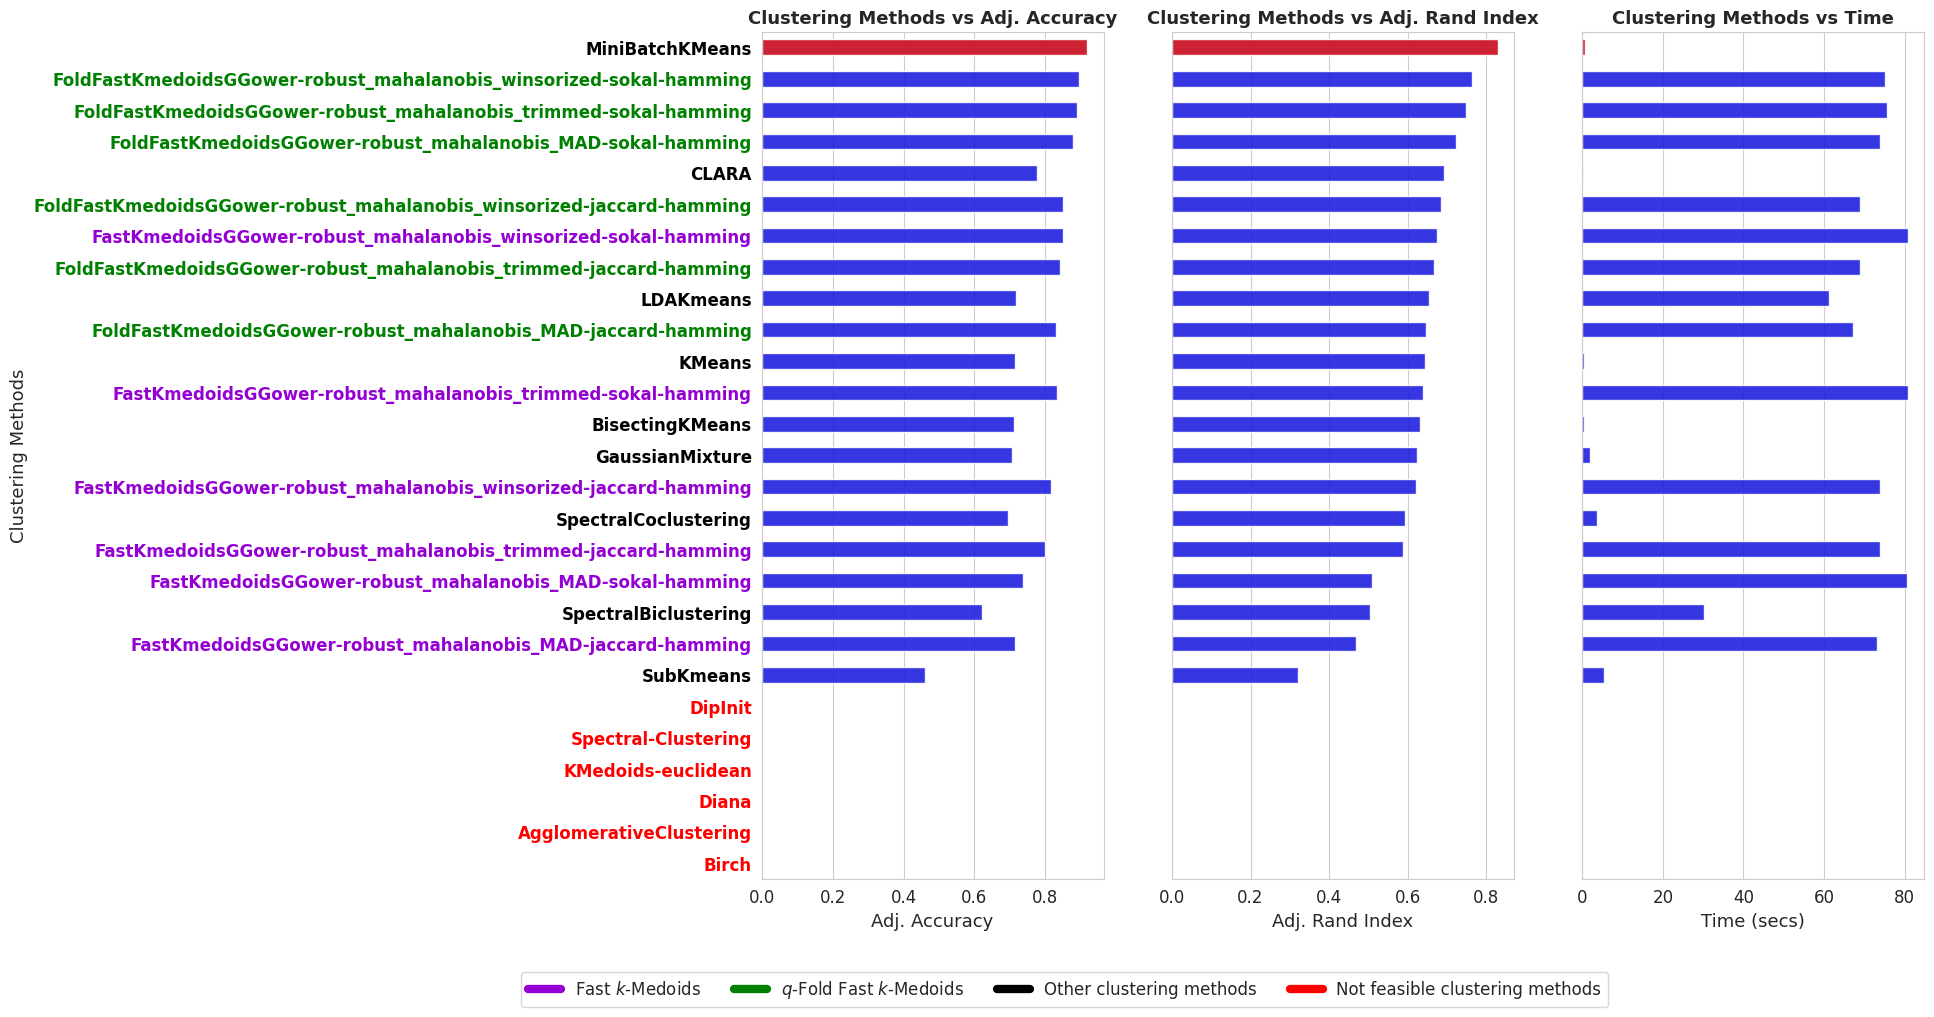

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,11))
axes = axes.flatten()

ax = sns.barplot(x=avg_adj_accuracy[idx_sorted], y=model_names[idx_sorted], color='blue', width=0.5, alpha=0.9, ax=axes[0])
ax = sns.barplot(x=[avg_adj_accuracy[idx_sorted[0]]], y=[model_names[idx_sorted[0]]], color='red', width=0.5, alpha=0.9, ax=axes[0])

ax = sns.barplot(x=avg_ari[idx_sorted], y=model_names[idx_sorted], color='blue', width=0.5, alpha=0.9, ax=axes[1])
ax = sns.barplot(x=[avg_ari[idx_sorted[0]]], y=[model_names[idx_sorted[0]]], color='red', width=0.5, alpha=0.9, ax=axes[1])

ax = sns.barplot(x=avg_time[idx_sorted], y=model_names[idx_sorted], color='blue', width=0.5, alpha=0.9, ax=axes[2])
ax = sns.barplot(x=[avg_time[idx_sorted[0]]], y=[model_names[idx_sorted[0]]], color='red', width=0.5, alpha=0.9, ax=axes[2])

axes[0].set_ylabel('Clustering Methods', size=13)
axes[0].set_xlabel('Adj. Accuracy', size=13)
#axes[0].set_xticks(np.round(np.linspace(0, np.max(accuracy_list), 7),2)) 
axes[0].tick_params(axis='y', labelsize=12)    
axes[0].tick_params(axis='x', labelsize=12)  
axes[0].set_title('Clustering Methods vs Adj. Accuracy', size=13, weight='bold')

axes[1].set_xlabel('Adj. Rand Index', size=13)
#axes[1].set_xticks(np.round(np.linspace(0, np.max(adj_rand_index_list), 7),2)) 
axes[1].tick_params(axis='x', labelsize=12)  
axes[1].set_title('Clustering Methods vs Adj. Rand Index', size=13, weight='bold')
axes[1].set_yticklabels([])

axes[2].set_xlabel('Time (secs)', size=13)
#axes[2].set_xticks(np.round(np.linspace(0, np.max(time_list), 7),2)) 
axes[2].tick_params(axis='x', labelsize=12)  
axes[2].set_title('Clustering Methods vs Time', size=13, weight='bold')
axes[2].set_yticklabels([])

for label in axes[0].get_yticklabels():
    if label.get_text() in our_methods_1:
        label.set_weight('bold')
        label.set_color('darkviolet') 
    elif label.get_text() in our_methods_2:
        label.set_weight('bold')
        label.set_color('green') 
    elif label.get_text() in other_methods:
        label.set_weight('bold')
        label.set_color('black') 
    elif label.get_text() in not_feasible_methods:
        label.set_weight('bold')
        label.set_color('red') 

# Create legend elements
legend_elements = [
    plt.Line2D([0], [0], color='darkviolet', lw=6, label='Fast $k$-Medoids'),
    plt.Line2D([0], [0], color='green', lw=6, label='$q$-Fold Fast $k$-Medoids'),
    plt.Line2D([0], [0], color='black', lw=6, label='Other clustering methods'),
    plt.Line2D([0], [0], color='red', lw=6, label='Not feasible clustering methods')
]

# Add legend to the figure
axes[0].legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(2.5, -0.1), ncol=len(legend_elements), fontsize=12)

fig.suptitle("Clustering Model Comparison \nFourth Simulation (300k) - Num. Experiment Realizations = 100", fontsize=16, fontweight='bold', y=0.97)

file_id = ''
plot_filename = f'plot_results_exp_4_simu_4_{file_id}_acc.png'
plot_save_path = os.path.join(results_folder_path, plot_filename)
fig.savefig(plot_save_path, format='png', dpi=300, bbox_inches="tight", pad_inches=0.2)

plt.show()

**Nota:** si queremos que los datos de tiempo sean coherentes con mi pc personal (realista con un PC de  usuario normal) hay que multiplicarlos por 2, ya que el experimento ha sido corrido con el server, y en base a mis pruebas piloto, el serber acorta los tiempos a la mitad, aprox.


In [18]:
# Results as table 
avg_results_df = pd.DataFrame(avg_results)
avg_results_df.index.name = 'models'
avg_results_df = avg_results_df.drop(['labels', 'adj_labels'], axis=1)
avg_results_df_srted_acc = avg_results_df.sort_values(by='adj_accuracy', ascending=False)
avg_results_df_srted_ari = avg_results_df.sort_values(by='ARI', ascending=False)

In [19]:
avg_results_df_srted_acc

,time,adj_accuracy,ARI
models,,,
MiniBatchKMeans,0.737116,0.918194,0.828652
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming,75.222789,0.895598,0.763689
FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming,75.704642,0.888146,0.748822
FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming,73.897386,0.876719,0.723322
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming,80.736637,0.850926,0.675541
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming,68.985627,0.849957,0.685922
FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming,68.969163,0.840371,0.667988
FastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming,80.792918,0.832377,0.639986
FoldFastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming,67.279021,0.830107,0.647321


In [20]:
avg_results_df_srted_ari

,time,adj_accuracy,ARI
models,,,
MiniBatchKMeans,0.737116,0.918194,0.828652
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming,75.222789,0.895598,0.763689
FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming,75.704642,0.888146,0.748822
FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming,73.897386,0.876719,0.723322
CLARA,0.255702,0.777542,0.691619
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming,68.985627,0.849957,0.685922
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming,80.736637,0.850926,0.675541
FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming,68.969163,0.840371,0.667988
LDAKmeans,61.245868,0.716295,0.654377
